## 习题 2.6

In [1]:
data <- read.csv("./ex_2_6.csv"); data

直径.x1.,高度.x2.,体积.y.
<dbl>,<int>,<dbl>
8.3,70,10.3
8.6,65,10.3
8.8,63,10.2
10.5,72,16.4
10.7,81,18.8
10.8,83,19.7
11.0,66,15.6
11.0,75,18.2
11.1,80,22.6


In [2]:
names(data) <- c("x1", "x2", "y")
attach(data)

在开始之前，先看一看数据的特征及相关关系：

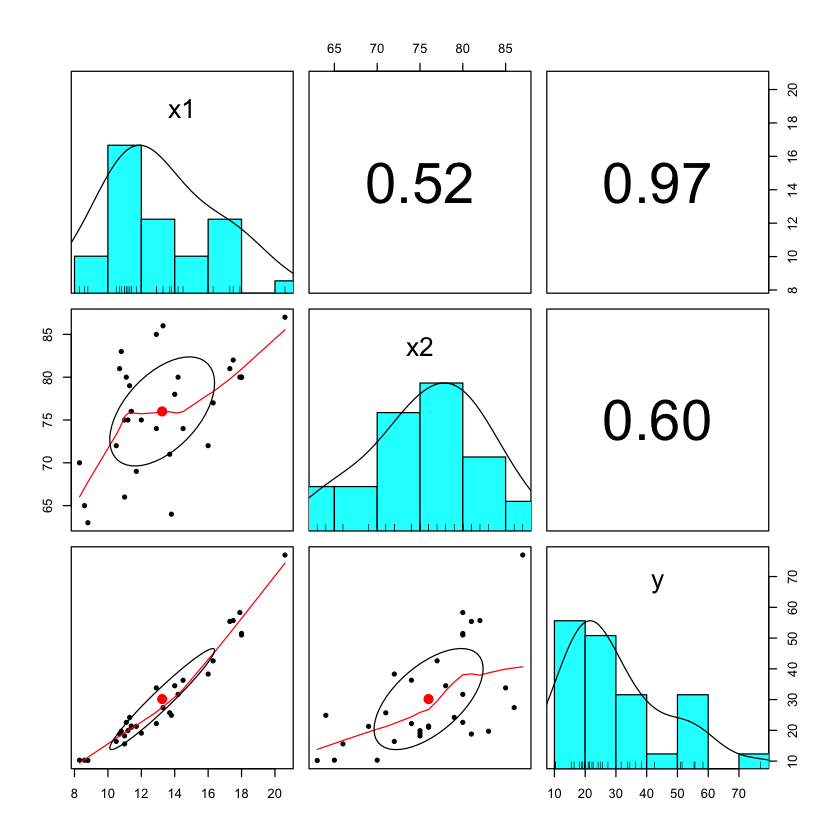

In [3]:
library(psych)
pairs.panels(data)

可以看到 $x_1$、$y$ 有很强的线性相关性； $x_2$ 对 $y$ 的相关性略差，但也足够高。

#### (1)

![题1](https://tva1.sinaimg.cn/large/008i3skNly1gr61tiqfrwj31fw040abk.jpg)

In [4]:
linear_model <- lm(y ~ x1 + x2, data=data)
summary(linear_model)


Call:
lm(formula = y ~ x1 + x2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4065 -2.6493 -0.2876  2.2003  8.4847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -57.9877     8.6382  -6.713 2.75e-07 ***
x1            4.7082     0.2643  17.816  < 2e-16 ***
x2            0.3393     0.1302   2.607   0.0145 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.882 on 28 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.9442 
F-statistic:   255 on 2 and 28 DF,  p-value: < 2.2e-16


分析结果中模型 $p<0.05$，假设合理，$R^2>0.94$ 拟合效果较好。
但注意到相比于 $x_1$， $x_2$ 项对 $y$ 没有非常显著的影响（$0.01<p<0.05$）。

用 aov 作出方差分析表：

In [5]:
summary(aov(linear_model))

            Df Sum Sq Mean Sq F value Pr(>F)    
x1           1   7582    7582 503.150 <2e-16 ***
x2           1    102     102   6.794 0.0145 *  
Residuals   28    422      15                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

下面作出各种残差诊断图：

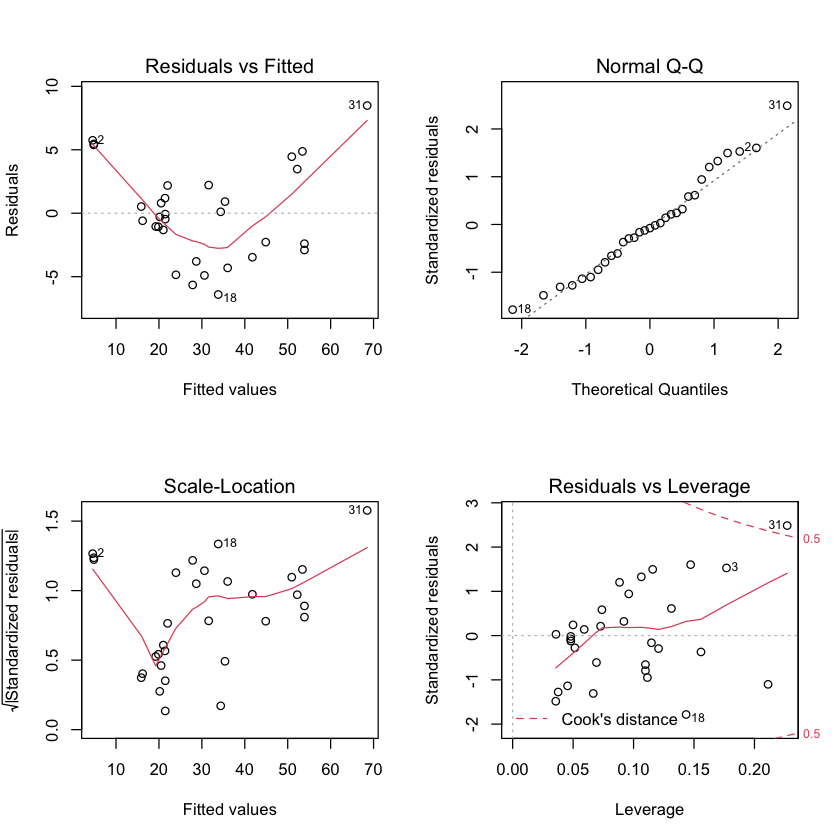

In [6]:
par(mfrow=c(2,2))
plot(linear_model)

从残差拟合图中可以看出，学生化残差明显不在同一条直线上，考虑对 $Y$ 作 Box_Cox 变换。

#### （2）

![题（2）](https://tva1.sinaimg.cn/large/008i3skNly1gr6a81zi2cj31eq04840k.jpg)

下面对数据进行 Box-Cox 变换后重新拟合：

[1] 0.3030303

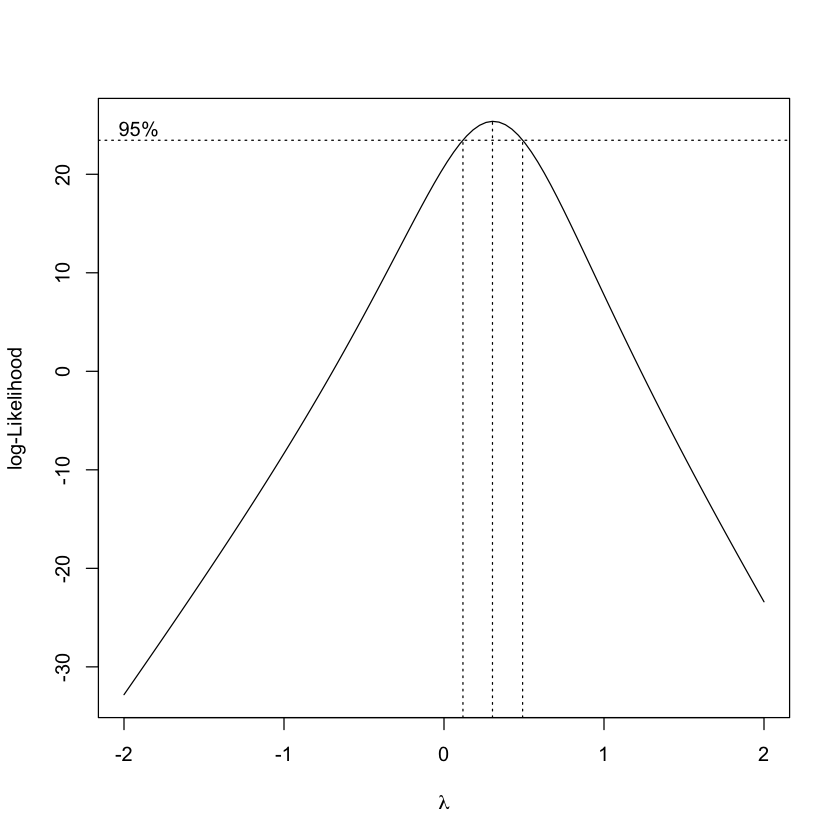

In [23]:
library(MASS)
bc <- boxcox(y ~ ., data=data)
idx <- which(bc$y==max(bc$y))
lambda <- bc$x[idx]
lambda

得到了 $\lambda = 0.303030303030303$，下面代入变换，重新拟合：

In [24]:
fmbc <- lm((y^lambda-1)/lambda ~ ., data)
summary(fmbc)


Call:
lm(formula = (y^lambda - 1)/lambda ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42600 -0.14274 -0.01468  0.18705  0.36851 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.733542   0.500080  -5.466 7.77e-06 ***
x1           0.409448   0.015299  26.764  < 2e-16 ***
x2           0.039685   0.007535   5.267 1.34e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2247 on 28 degrees of freedom
Multiple R-squared:  0.9775,	Adjusted R-squared:  0.9759 
F-statistic: 609.6 on 2 and 28 DF,  p-value: < 2.2e-16


拟合效果有所提升，

In [26]:
summary(aov(fmbc))

            Df Sum Sq Mean Sq F value   Pr(>F)    
x1           1  60.17   60.17 1191.45  < 2e-16 ***
x2           1   1.40    1.40   27.74 1.34e-05 ***
Residuals   28   1.41    0.05                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

检验 $p<0.001$，$x_1$、$x_2$ 对变换后的 $y$ 有显著影响，认为变换后的 $Y$ 与 $X_1$、$X_2$ 之间的线性关系较为合理。

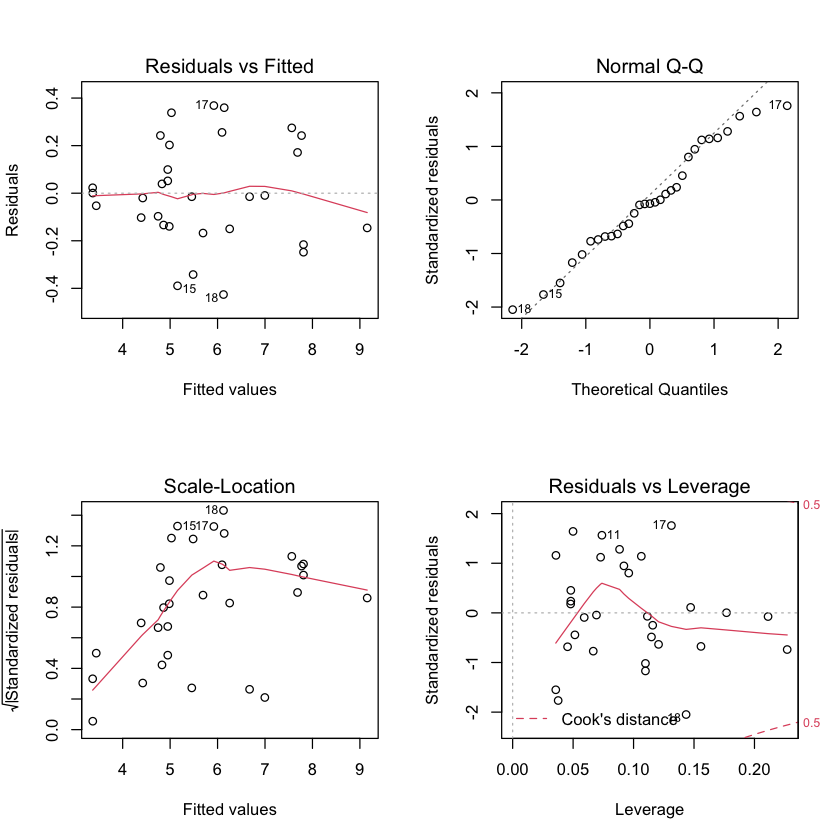

In [25]:
par(mfrow=c(2,2))
plot(fmbc)

从图中可以看出，无论是学生化残差的正态 Q-Q 图还是变换后因变量的拟合值都有明显的改观。

还可以进一步作正态性检验：

In [19]:
ks.test(residuals(fmbc), "pnorm")


	One-sample Kolmogorov-Smirnov test

data:  residuals(fmbc)
D = 0.35625, p-value = 0.0005008
alternative hypothesis: two-sided


综上，认为数据满足正态性。Box-Cox 变换效果显著。

In [29]:
detach(data)